# Introduction to Seaborn

Sources and inspiration:


*   https://www.kaggle.com/code/tirendazacademy/penguin-dataset-data-visualization-with-seaborn#Penguin-Dataset:-Data-Visualization-with-Seaborn
*   https://seaborn.pydata.org/tutorial/categorical.html
* https://pandas.pydata.org/docs/user_guide/visualization.html
* https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00

If running this from Google Colab, uncomment the cell below and run it. Otherwise, just skip it.

In [1]:
# !pip install watermark

Seaborn is a library for making statistical graphics in Python. It builds on top of [`matplotlib`](https://matplotlib.org/) and integrates closely with [`pandas`](https://pandas.pydata.org/) data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them.

Here's an example of what seaborn can do:

In [2]:
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt

c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


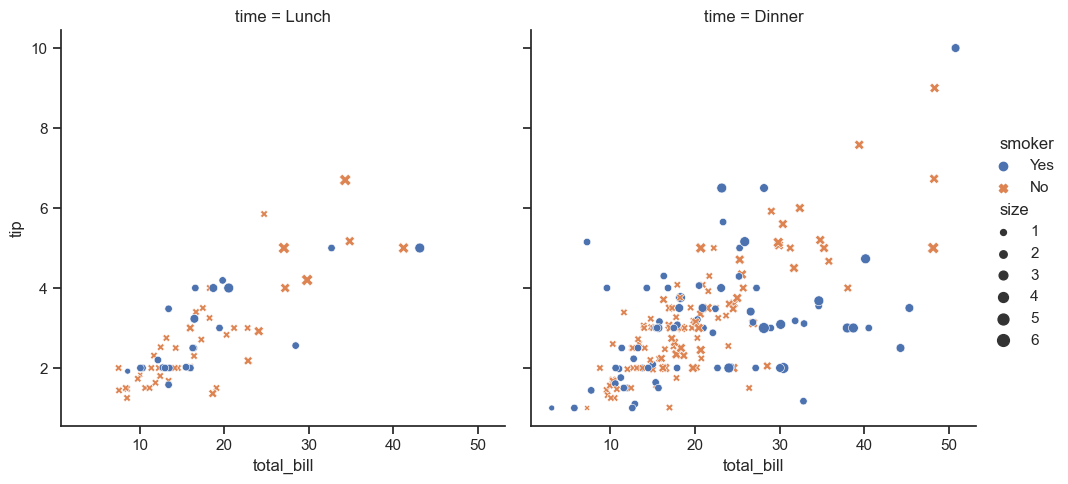

In [3]:
# Apply the default theme
sns.set_theme(style="ticks")

# Load an example dataset
tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    style="smoker",
    size="size",
)
plt.show()

This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function `relplot`. Notice how we provided only the names of the variables and their roles in the plot. Unlike when using matplotlib directly, it wasn't necessary to specify attributes of the plot elements in terms of the color values or marker codes. Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands. This declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.

Here is a similar example from a different dataset: intensity and shape measurements from objects in 2 fluorescence images.

In [4]:
nuclei_features_df = pd.read_csv("../../data/BBBC007_analysis.csv")
nuclei_features_df['round'] = nuclei_features_df['aspect_ratio'] < 1.2
nuclei_features_df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name,round
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL,False
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL,False
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL,False
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL,False
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL,True


c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


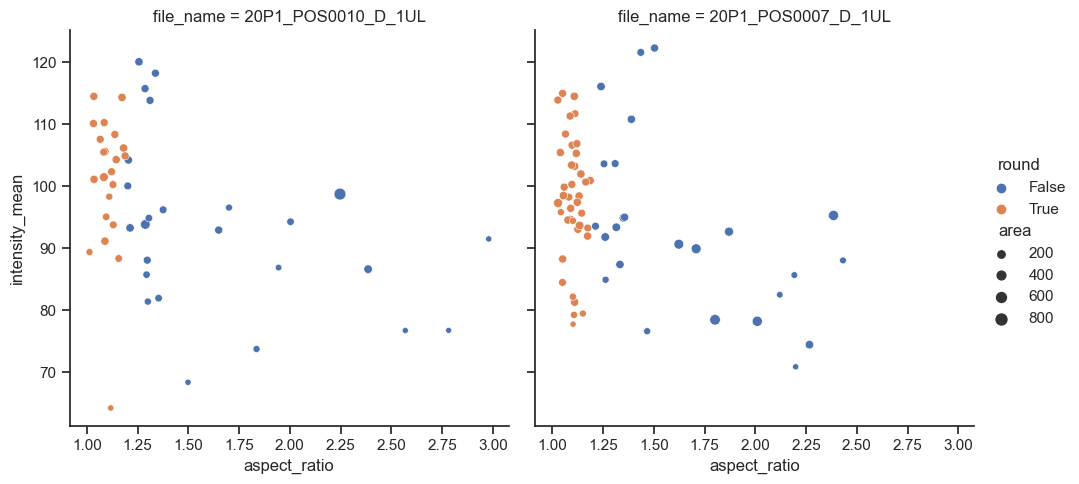

In [5]:
sns.relplot(
    data=nuclei_features_df,
    x="aspect_ratio",
    y="intensity_mean",
    size="area",
    hue="round",
    col="file_name"
    )

## A high-level API for statistical graphics

There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

### Other `relplot` examples

The function `relplot` is named that way because it is designed to visualize many different statistical *relationships*. While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line. The `relplot` function has a convenient ``kind`` parameter that lets you easily switch to this alternate representation:

c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


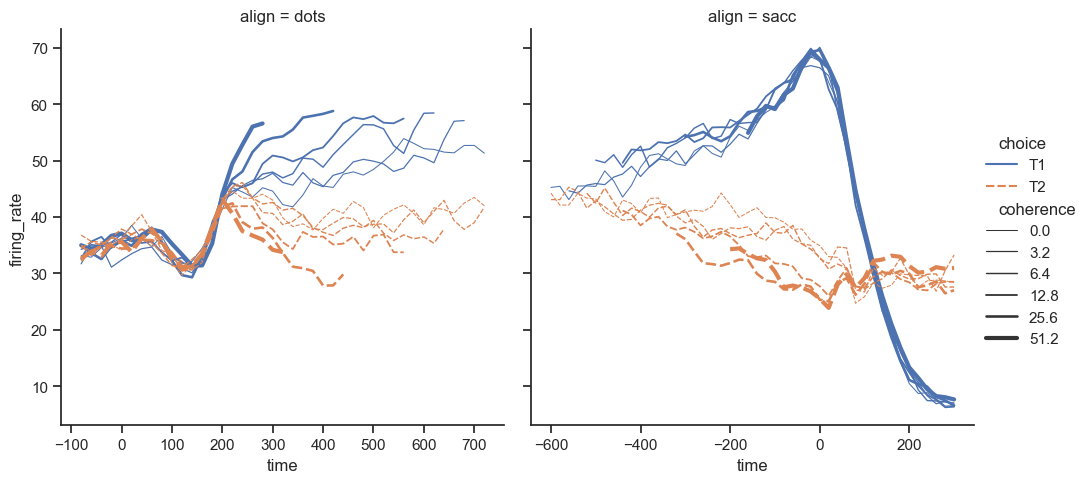

In [6]:
dots = sns.load_dataset("dots")
sns.relplot(
    data=dots,
    kind="line",
    x="time",
    y="firing_rate",
    col="align",
    hue="choice",
    size="coherence",
    style="choice",
    facet_kws=dict(sharex=False),
)

Notice how the ``size`` and ``style`` parameters are used in both the scatter and line plots, but they affect the two visualizations differently: changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot. We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey.


Often, we are interested in the *average* value of one variable as a function of other variables. Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions:

c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


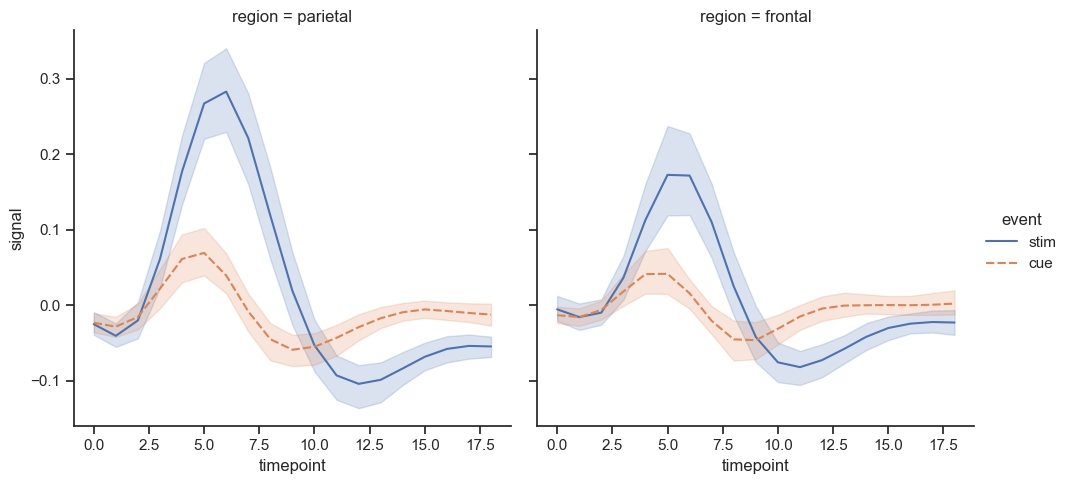

In [7]:
fmri = sns.load_dataset("fmri")
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    col="region",
    hue="event",
    style="event",
)

c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\mazo260d\mambaforge\envs\devbio-napari-clone\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


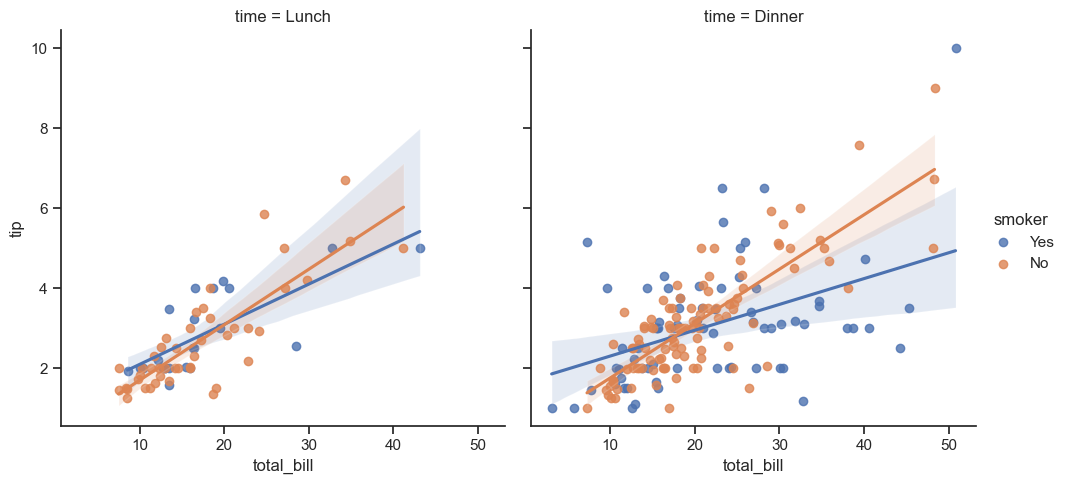

In [8]:
sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker")

## Exercise

Take the `nuclei_features_df` again and plot a line regression model on a single plot, with points and lines having different colors according to 'file_name'.

*Hint: use a `lmplot` and the `hue` argument*

In [9]:
from watermark import watermark
watermark(iversions=True, globals_=globals())
print(watermark())
print(watermark(packages="watermark,numpy,pandas,seaborn,matplotlib,scipy,statannotations"))

Last updated: 2023-08-25T14:46:57.523022+02:00

Python implementation: CPython
Python version       : 3.9.17
IPython version      : 8.14.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
CPU cores   : 16
Architecture: 64bit

watermark      : 2.4.3
numpy          : 1.23.5
pandas         : 2.0.3
seaborn        : 0.12.2
matplotlib     : 3.7.2
scipy          : 1.11.2
statannotations: 0.4.4

